# Description

TODO

# Modules loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test-ccc_mic"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / "time_test"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [5]:
INPUT_DIR = (
    conf.RESULTS_DIR / "time_test"
)
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [6]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [7]:
time_results.shape

(100, 4)

In [8]:
time_results.head()

,data_size,method,time,sim
0,100,cm,0.290372,0.020470
1,100,cm,0.003474,0.015353
2,100,cm,0.003409,0.067422
3,100,cm,0.003314,0.058579
4,100,cm,0.003159,0.054949


# Processing

In [9]:
time_results = time_results.replace(
    {
        "method": {
            "p": "Pearson",
            "s": "Spearman",
            "cm": "CCC",
            "mic": "MIC",
        }
    }
)

In [10]:
time_results.shape

(100, 4)

In [11]:
time_results.head()

,data_size,method,time,sim
0,100,CCC,0.290372,0.020470
1,100,CCC,0.003474,0.015353
2,100,CCC,0.003409,0.067422
3,100,CCC,0.003314,0.058579
4,100,CCC,0.003159,0.054949


In [12]:
time_results.groupby(["data_size", "method"])["time"].describe()

count      mean       std       min       25%       50%  \
data_size method                                                            
100       CCC      10.0  0.031897  0.090819  0.002944  0.003016  0.003211   
          MIC      10.0  0.004556  0.000554  0.003587  0.004301  0.004687   
500       CCC      10.0  0.008187  0.000794  0.006714  0.007627  0.008443   
          MIC      10.0  0.054541  0.004373  0.049693  0.051152  0.052135   
1000      CCC      10.0  0.011954  0.000626  0.011399  0.011647  0.011769   
          MIC      10.0  0.159975  0.006683  0.152865  0.156375  0.159312   
5000      CCC      10.0  0.053320  0.005862  0.047850  0.049858  0.050585   
          MIC      10.0  1.974016  0.103306  1.849772  1.908819  1.946344   
10000     CCC      10.0  0.134413  0.046743  0.103280  0.106101  0.110183   
          MIC      10.0  7.571482  0.694893  6.748206  7.174231  7.281321   

                       75%       max  
data_size method                      
100       CCC     0.003385  0.290372  
          MIC     0.004878  0.005318  
500       CCC     0.008599  0.009187  
          MIC     0.058821  0.060448  
1000      CCC     0.011875  0.013585  
          MIC     0.160282  0.177050  
5000      CCC     0.056264  0.066658  
          MIC     2.022819  2.196259  
10000     CCC     0.151916  0.241261  
          MIC     7.993260  8.698138

# Plot

In [13]:
hue_order = ["CCC", "MIC"]

In [14]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [15]:
colors = {
    "CCC": deep_colors[0],
    "MIC": deep_colors[3],
}

In [16]:
plot_data = time_results[time_results["data_size"] >= 500]

In [17]:
# plot_data = plot_data.assign(
#     data_size=plot_data["data_size"].apply(lambda x: f"{int(x/1000)}k" if x < 1000000 else f"{int(x/1000000)}m")
# )

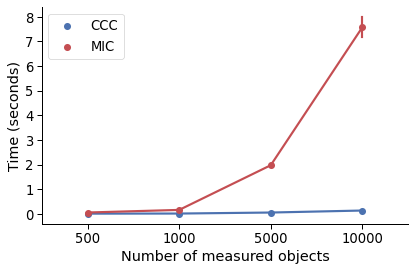

In [18]:
with sns.plotting_context('paper', font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x='data_size',
        y='time',
        hue='method',
        hue_order=hue_order,
        palette=colors,
        legend=False
    )
    sns.despine()
    plt.legend(loc='best')
    plt.xlabel('Number of measured objects')
    plt.ylabel('Time (seconds)')
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f'{INPUT_FILENAME_TEMPLATE}.svg',
        bbox_inches="tight",
        facecolor="white",
    )
    # ax.set_yscale('log')

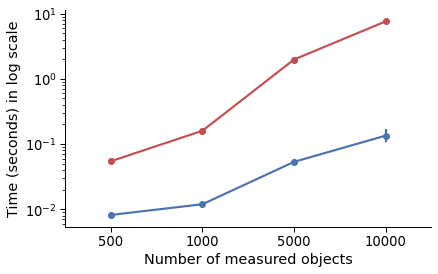

In [19]:
with sns.plotting_context('paper', font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x='data_size',
        y='time',
        hue='method',
        hue_order=hue_order,
        palette=colors,
        legend=False,
    )
    sns.despine()
    plt.legend([],[], frameon=False)
    plt.xlabel('Number of measured objects')
    plt.ylabel('Time (seconds) in log scale')
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f'{INPUT_FILENAME_TEMPLATE}-log.svg',
        bbox_inches="tight",
        facecolor="white",
    )
    ax.set_yscale('log')